# Regularized Linear Models

In [ ]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..", "src")))
import helpers

import importlib
importlib.reload(helpers)

import numpy as np
import matplotlib.pyplot as plt

<module 'helpers' from '/Users/boris.tsarev/MyProjects/ai-explore/src/helpers.py'>

To **regularize** - to constrain.
- For polynomial regression - reduce the number of polynomial degrees 
- For linear - constrain weights of the model

## Ridge Regression
Includes $l_2$ regularization term $\frac{\alpha}{m} \sum_{i=1}^{n} \theta_i^2$ in the cost function

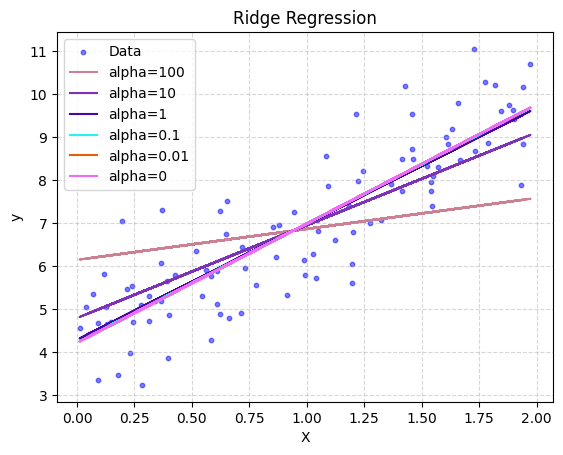

In [ ]:
from sklearn.linear_model import Ridge

X, y = helpers.generate_linear_data()
helpers.prepare_plot_data(X, y, title="Ridge Regression")

def ridge_regression_plot(alpha):
    ridge_reg = Ridge(alpha=alpha, solver="cholesky")
    ridge_reg.fit(X, y)
    y_pred = ridge_reg.predict(X)

    # use random color for each alpha
    plt.plot(X, y_pred, color=np.random.rand(3,), label=f"alpha={alpha}")

for alpha in [100, 10, 1, 0.1, 0.01, 0]:
    ridge_regression_plot(alpha)

plt.legend()
plt.show()

## Lasso Regression

Includes $l_1$ regularization term $2\alpha \sum_{i=1}^{n} \lvert\theta_i\rvert$  
It eliminates the weights of least important features

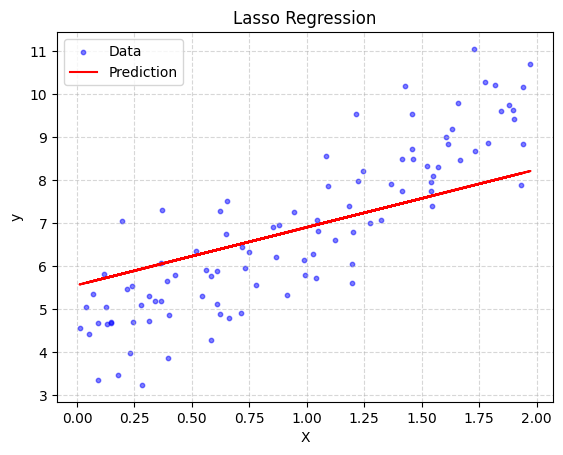

In [14]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.5)
lasso_reg.fit(X, y)
y_pred = lasso_reg.predict(X)

helpers.prepare_plot_data(X, y, title="Lasso Regression")
plt.plot(X, y_pred, color="r", label="Prediction")
plt.legend()
plt.show()

## Elastic Net Regression
Middle ground between ridge and lasso regressions  

Regularization term $ (1 - r)\,\frac{\alpha}{m} \sum_{i=1}^{n} \theta_i^2 \;+\; r\, 2\alpha \sum_{i=1}^{n} \lvert \theta_i \rvert $ with control hyperparameter $r$

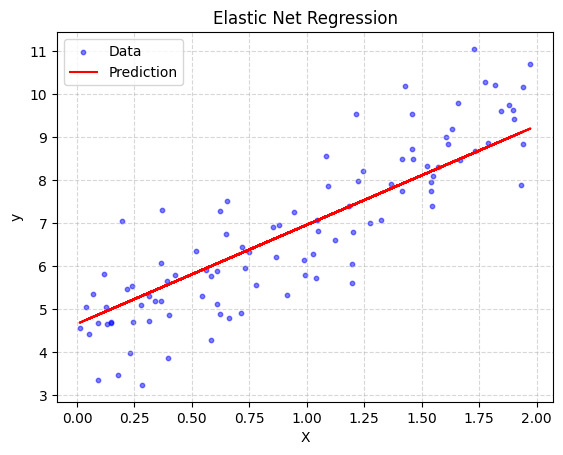

In [15]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
y_pred = elastic_net.predict(X)
helpers.prepare_plot_data(X, y, title="Elastic Net Regression")
plt.plot(X, y_pred, color="r", label="Prediction")
plt.legend()
plt.show()

## Recommendations
- Avoid plain linear regression generally, use some regularization
- Ridge is good as a default, lasso or elastic if suspect only a few features are usefull


## Early Stopping

Stop training as soon as validation error reaches the minimum